In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

# Data visualisation
import sklearn.metrics as metrics
import scipy.stats as stats

!pip install --upgrade category_encoders
# Encoding
import category_encoders as ce

# Upscaling
from sklearn.utils import resample

# Machine learning
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Import and Read Dataset

In this section, we will be importing our two csv datasets: credit_record.csv which contains status the target variable and application_record.csv which contains the variables used to predict status. We will also be visualising the number, type and name of the various variables in both datasets.

In [2]:
# Getting Datasets
pd.set_option("display.max_rows", 50)
cr = pd.read_csv("credit_record.csv")
ar = pd.read_csv("application_record.csv")

In [3]:
# Viewing credit record
print(cr)

              ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]


In [4]:
# Getting info of credit record
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
# Viewing application record
print(ar)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0      

In [6]:
# Getting info of application record
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

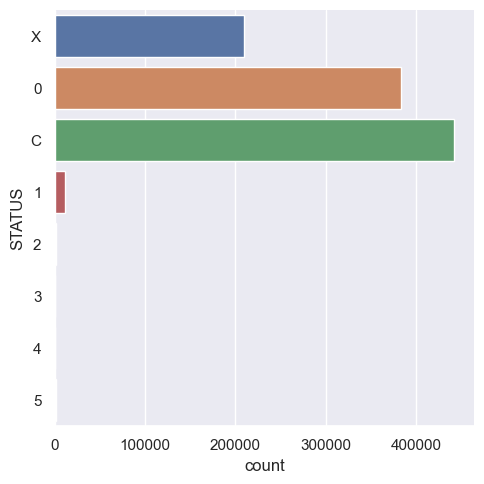

In [7]:
# Visualising Status
sb.catplot(y="STATUS",data= cr,kind="count")

## Data Cleaning

In this section, we will be making changes to the variable Status to fit our problem statment as well as combine and average out Status such that there are no repeated IDs. We will also be combining the two datasets and remove all the different ID in the process using masking.

In [8]:
# Replacing the values in STATUS
cr['STATUS'].replace(['0'], 1 ,inplace= True) # 1-29 days past due
cr['STATUS'].replace(['1'], 1,inplace= True) # 30-59 days past due
cr['STATUS'].replace(['2'], 1 ,inplace= True) # 60-89 days overdue
cr['STATUS'].replace(['3'], 1,inplace= True) # 90-119 days overdue
cr['STATUS'].replace(['4'], 1 ,inplace= True) # 120-149 days overdue
cr['STATUS'].replace(['5'], 1,inplace= True) # Overdue or bad debts, write-offs for more than 150 days
cr['STATUS'].replace(['C'], 0,inplace= True) # Loan paid off for that month
cr['STATUS'].replace(['X'], 0,inplace= True) # No loan for the month

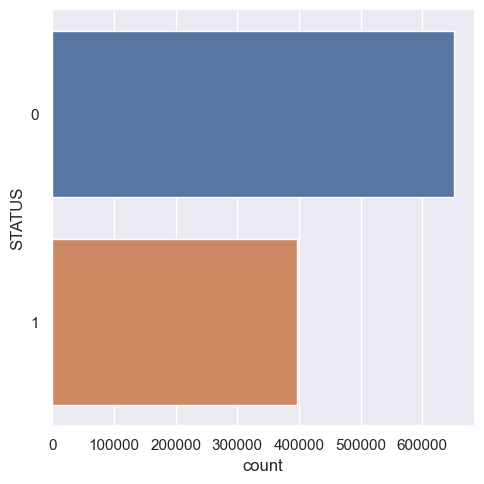

In [9]:
# Visualising the changes in Status
sb.catplot(y="STATUS",data= cr,kind="count")
plt.show()

In [10]:
# Changing datatype of STATUS in cr
cr['STATUS'] = cr['STATUS'].astype('int64')
# Checking if change has been made
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [11]:
# Filling the NULL valus in Occupation Type in ar
ar['OCCUPATION_TYPE'].fillna(value="NA", inplace= True)

In [12]:
# Combining all the repeated IDs and averaging out STATUS
cr = cr.groupby(['ID'])['STATUS'].agg('mean')

In [13]:
# merging the 2 dataframes and removing all different IDs
merged_df = pd.merge(cr, ar, on="ID", how="inner")
# Rounding up STATUS to whole nummber
merged_df["STATUS"] = np.ceil(merged_df["STATUS"])
print(merged_df)

            ID  STATUS CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804     1.0           M            Y               Y             0   
1      5008805     1.0           M            Y               Y             0   
2      5008806     1.0           M            Y               Y             0   
3      5008808     1.0           F            N               Y             0   
4      5008809     0.0           F            N               Y             0   
...        ...     ...         ...          ...             ...           ...   
36452  5150482     1.0           F            Y               Y             1   
36453  5150483     0.0           F            Y               Y             1   
36454  5150484     1.0           F            Y               Y             1   
36455  5150485     1.0           F            Y               Y             1   
36456  5150487     0.0           M            Y               N             0   

       AMT_INCOME_TOTAL    

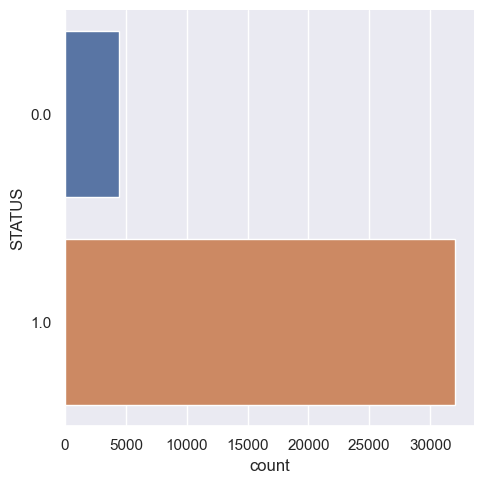

In [14]:
# Seeing the distrubution of data for STATUS
sb.catplot(y="STATUS",data= merged_df,kind="count")
plt.show()

In [15]:
merged_df['STATUS'].value_counts()

1.0    32002
0.0     4455
Name: STATUS, dtype: int64

In [16]:
merged_df.to_csv('cleaned_dataset.csv')